# Análise de Dados - UFPB

**Professor** : Marcus Carvalho

Alunos: Aldemir Carlos Alves e Ana Luísa Freitas

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geobr as geo
import matplotlib.patches as mpatches
import geopandas as gpd



desmatamento = (
    pd.read_csv('dados/municipio_bioma.csv'))


municipios_data = (
    pd.read_csv('dados/Lista_Municípios_com_IBGE_Brasil_Versao_CSV.csv', encoding='ISO-8859-1', delimiter=';')
)

# Vamos tentar uma abordagem mais direta usando uma expressão lambda para substituir os zeros.
desmatamento['area_total'] = desmatamento['area_total'].apply(lambda x: pd.NA if x == 0 else x)

# Após substituir os zeros, vamos prosseguir com a remoção de duplicatas e a verificação final do dataframe
desmatamento = desmatamento.drop_duplicates()
missing_data = desmatamento.isnull().sum()
data_types = desmatamento.dtypes

desmatamento

,ano,id_municipio,bioma,area_total,desmatado,vegetacao_natural,nao_vegetacao_natural,hidrografia
0,2012,1707207,Amazônia,<NA>,61.9,-62.1,0.2,0.0
1,2004,1707207,Amazônia,<NA>,60.0,-60.2,0.2,0.0
2,2015,1707207,Amazônia,<NA>,61.9,-62.1,0.2,0.0
3,2021,1707207,Amazônia,<NA>,61.9,-62.1,0.2,0.0
4,2017,1707207,Amazônia,<NA>,61.9,-62.1,0.2,0.0
...,...,...,...,...,...,...,...,...
150323,2005,1100106,Amazônia,24831,1370.4,19462.8,3853.0,144.8
150324,2021,1100106,Amazônia,24831,1607.5,19225.7,3853.0,144.8
150325,2011,1100106,Amazônia,24831,1431.9,19401.3,3853.0,144.8
150326,2015,1100106,Amazônia,24831,1494.5,19338.7,3853.0,144.8


(-76.23979906784994,
 -26.591086199149935,
 -37.060078841576086,
 9.154426374099277)

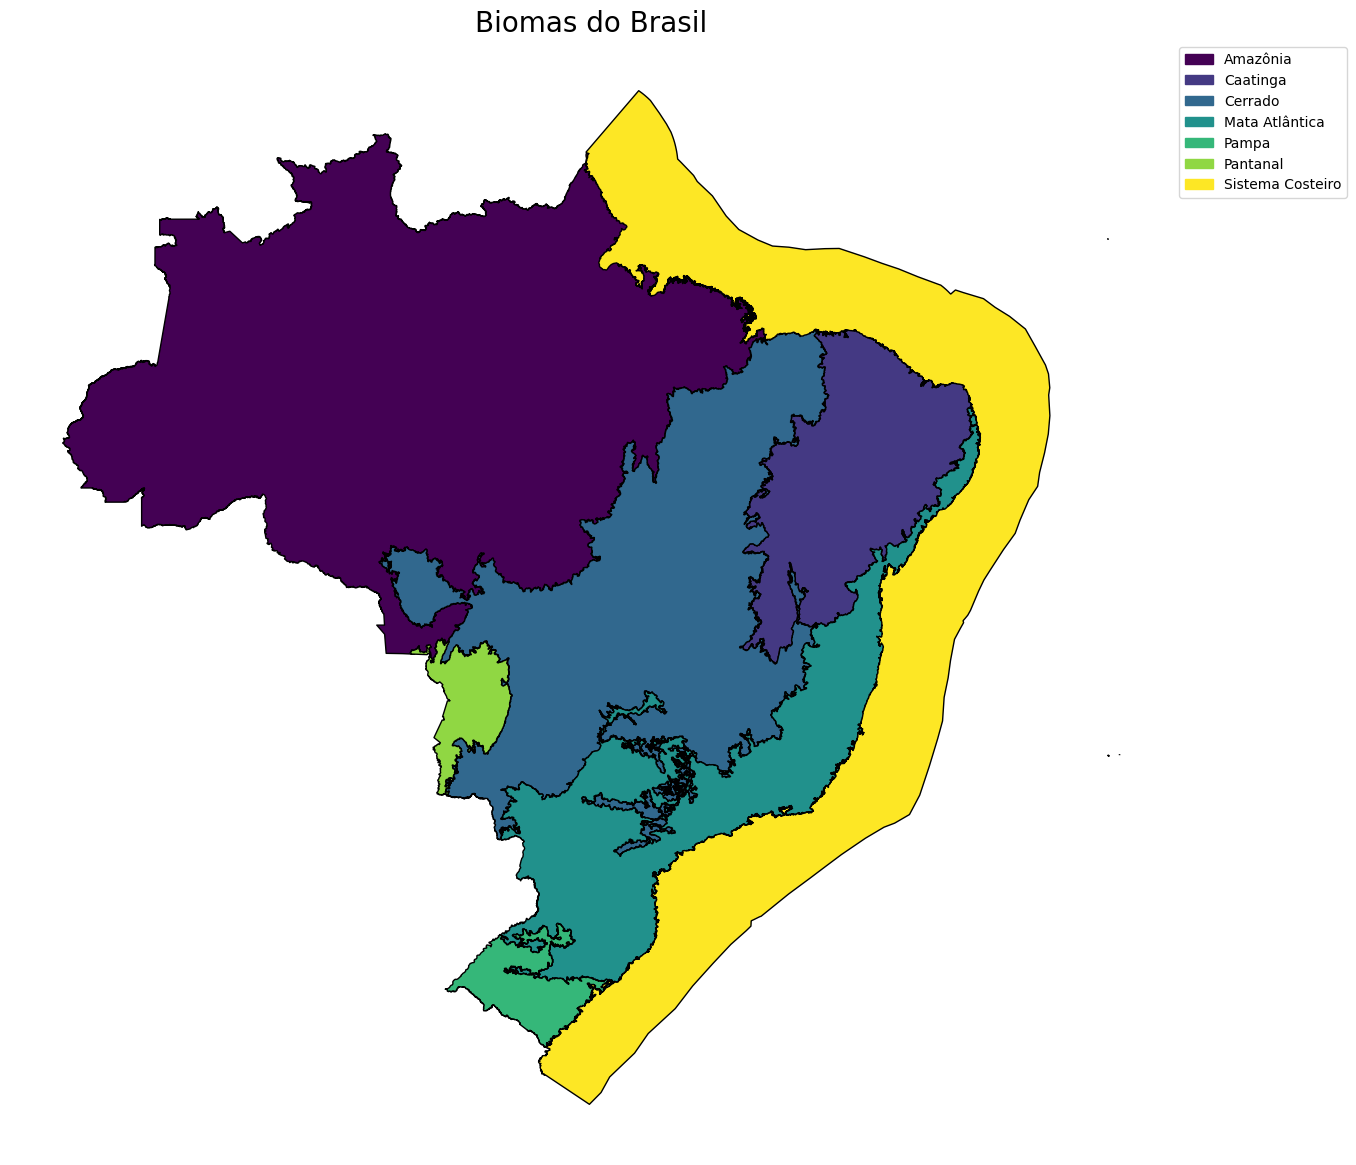

In [2]:
biomas = geo.read_biomes(year=2019) 

colors = ['#440154', '#443983', '#31688E', '#21918C', '#35B779', '#90D743', '#FDE725']  
biomes = ['Amazônia', 'Caatinga', 'Cerrado', 'Mata Atlântica', 'Pampa', 'Pantanal', 'Sistema Costeiro']  

ig, ax = plt.subplots(figsize=(15, 15), dpi=100)
patches = [mpatches.Patch(color=color, label=biome) for color, biome in zip(colors, biomes)]
biomas.plot(cmap='viridis', edgecolor="#000000", ax=ax, legend=True)

ax.legend(handles=patches, bbox_to_anchor=(1, 1), loc='upper left')
ax.set_title("Biomas do Brasil", fontsize=20)
ax.axis("off")

C:\Users\aldem\AppData\Local\Temp\ipykernel_6064\3906715712.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bioma', y='desmatado', data=desmatamento_bioma, ax=ax[1], palette='viridis')


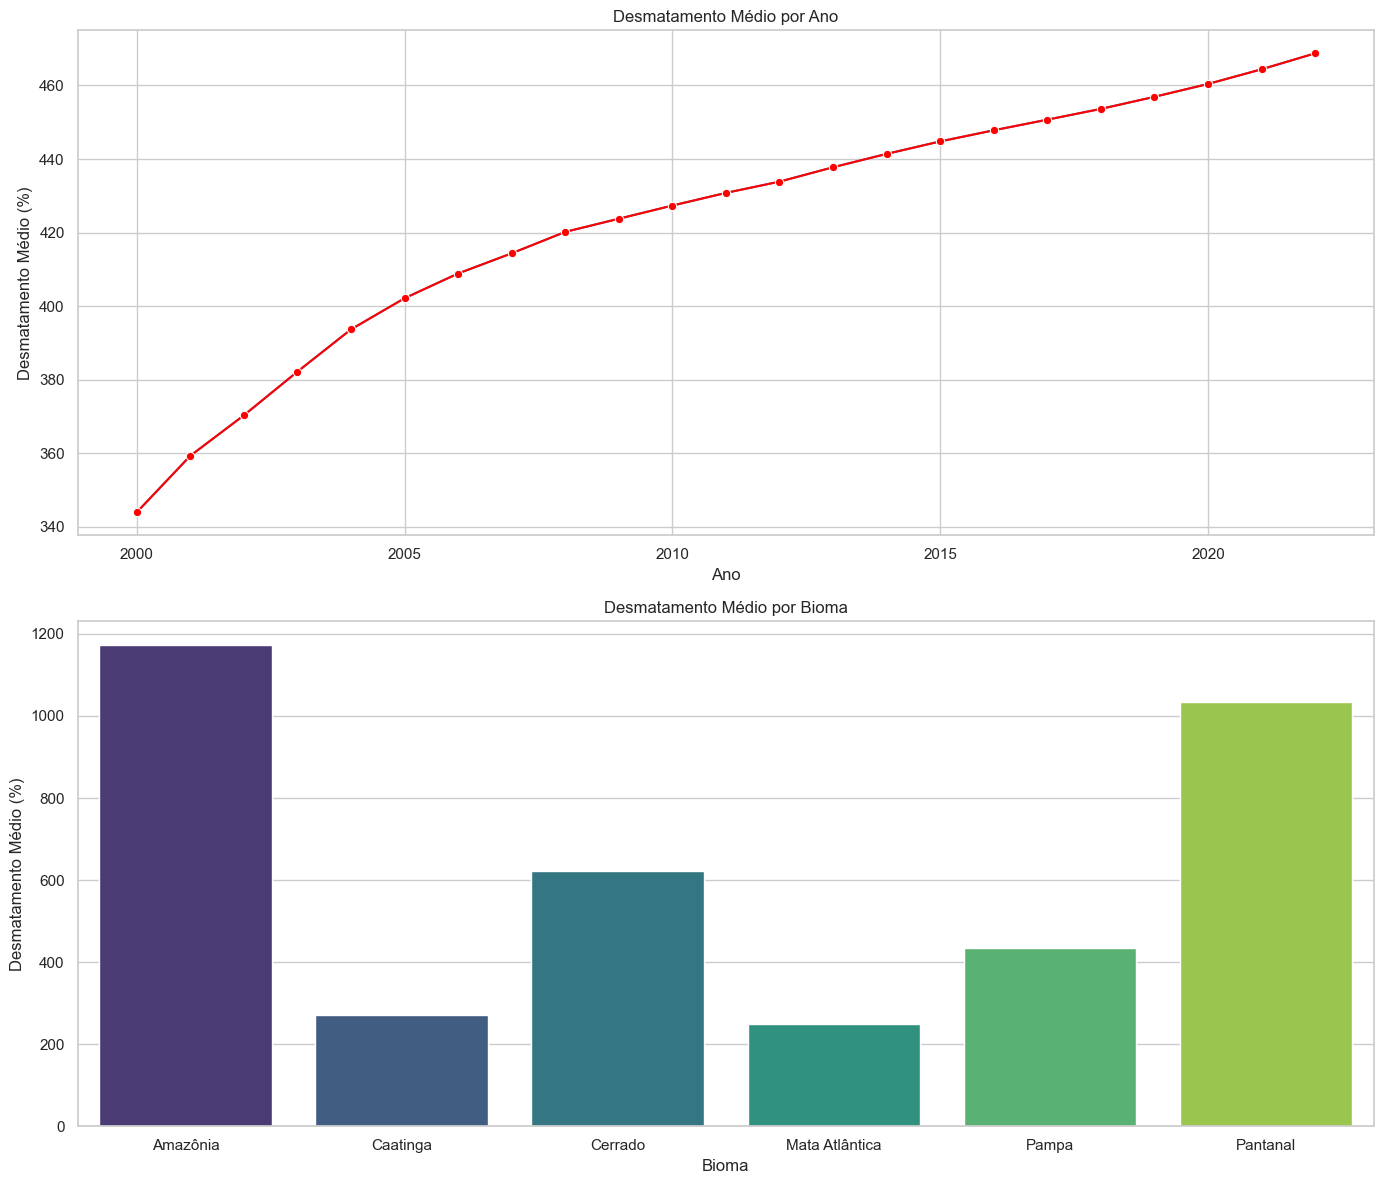

In [3]:

# Definindo o estilo dos gráficos
sns.set(style="whitegrid")

# Calculando a média de desmatamento por ano
desmatamento_ano = desmatamento.groupby('ano')['desmatado'].mean().reset_index()

# Calculando a média de desmatamento por bioma
desmatamento_bioma = desmatamento.groupby('bioma')['desmatado'].mean().reset_index()

# Criando gráficos para visualizar as tendências
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Gráfico de desmatamento médio por ano
sns.lineplot(x='ano', y='desmatado', data=desmatamento_ano, ax=ax[0], marker='o')
ax[0].set_title('Desmatamento Médio por Ano')
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Desmatamento Médio (%)')

# Gráfico de desmatamento médio por bioma
sns.barplot(x='bioma', y='desmatado', data=desmatamento_bioma, ax=ax[1])
ax[1].set_title('Desmatamento Médio por Bioma')
ax[1].set_xlabel('Bioma')
ax[1].set_ylabel('Desmatamento Médio (%)')
# Change the color of the line plot
sns.lineplot(x='ano', y='desmatado', data=desmatamento_ano, ax=ax[0], marker='o', color='red')
# Change the color of the bar plot
sns.barplot(x='bioma', y='desmatado', data=desmatamento_bioma, ax=ax[1], palette='viridis')


plt.tight_layout()
plt.show()


In [4]:

# Carrega dados geográficos de todos os municípios
geo_municipios = geo.read_municipality(year=2019, code_muni='all')

# Garantir que o código do município esteja no mesmo formato
geo_municipios['code_muni'] = geo_municipios['code_muni'].astype(int)
desmatamento['id_municipio'] = desmatamento['id_municipio'].astype(int)

# Combinar os dataframes
combined_data = pd.merge(geo_municipios, desmatamento, how='left', left_on='code_muni', right_on='id_municipio')



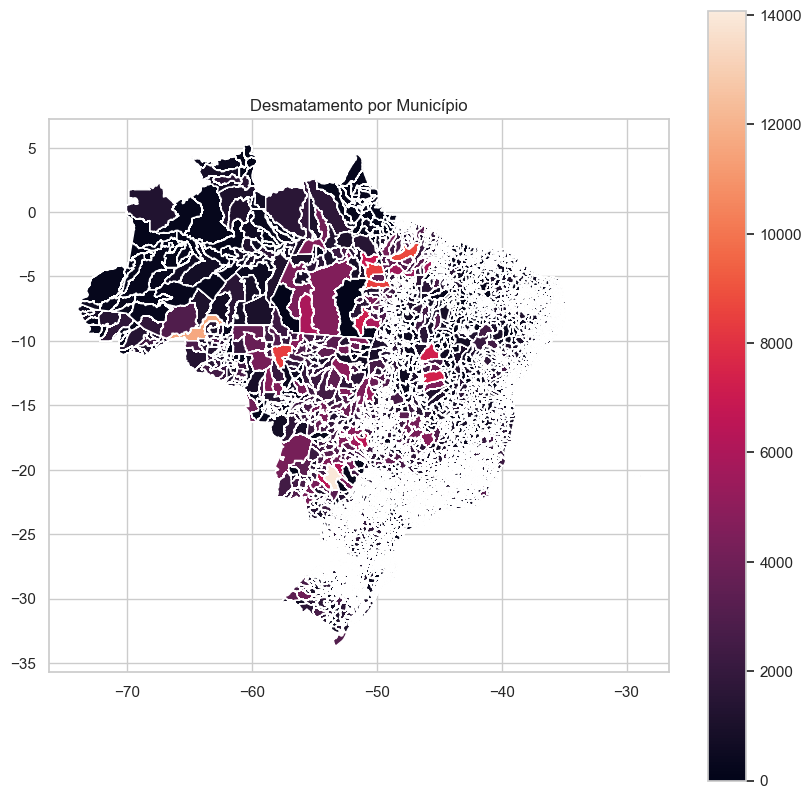

In [5]:

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
combined_data.plot(column='desmatado', ax=ax, legend=True)
plt.title('Desmatamento por Município')
plt.show()


In [6]:
# Agrupar por bioma e calcular a média de desmatamento
desmatamento_bioma = combined_data.dissolve(by='bioma', aggfunc={'desmatado':'mean'})

# Plotar o mapa
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
desmatamento_bioma.plot(column='desmatado', ax=ax, legend=True,
                        legend_kwds={'label': "Média de Desmatamento (%)",
                                     'orientation': "horizontal"})
plt.title('Média de Desmatamento por Bioma no Brasil')
plt.show()

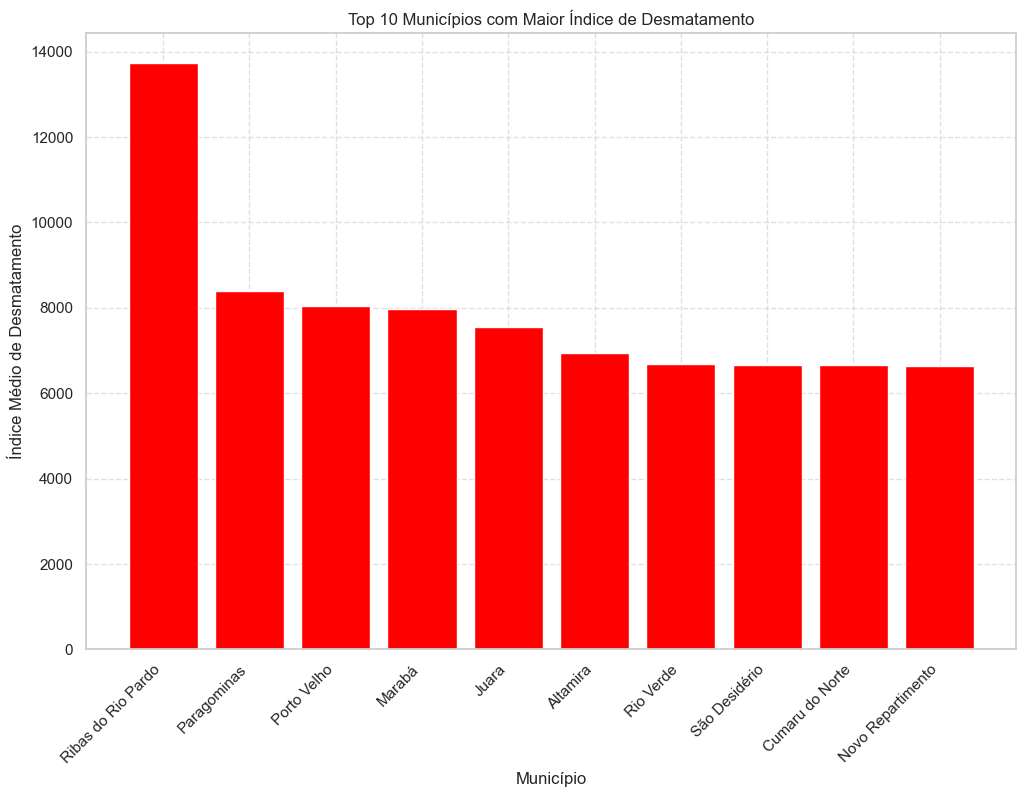

,Município,UF
0,Ribas do Rio Pardo,MS
1,Paragominas,PA
2,Porto Velho,RO
3,Marabá,PA
4,Juara,MT
5,Altamira,PA
6,Rio Verde,GO
7,São Desidério,BA
8,Cumaru do Norte,PA
9,Novo Repartimento,PA


In [ ]:
# Agrupando e calculando a média do desmatamento
municipios_desmatamento = desmatamento.groupby('id_municipio')['desmatado'].mean()

# Ordenando os municípios pelo desmatamento médio
top_desmatamento = municipios_desmatamento.sort_values(ascending=False).head(20)

top_desmatamento

# Selecionando apenas os top 10 municípios com o maior índice de desmatamento
top_10_desmatamento = top_desmatamento.head(10)

# Mapeando os códigos dos municípios aos seus respectivos nomes usando o código IBGE7
top_10_desmatamento_names = top_10_desmatamento.reset_index().merge(municipios_data, left_on='id_municipio', right_on='IBGE7', how='left')

# Selecionando as colunas relevantes para o gráfico
top_10_desmatamento_names = top_10_desmatamento_names[['Município', 'desmatado', 'UF']]

# Preparando o gráfico com nomes de municípios
plt.figure(figsize=(12, 8))
plt.bar(top_10_desmatamento_names['Município'], top_10_desmatamento_names['desmatado'], color='red')
plt.title('Top 10 Municípios com Maior Índice de Desmatamento')
plt.xlabel('Município')
plt.ylabel('Índice Médio de Desmatamento')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Mostrando os nomes e os estados dos municípios para verificação
top_10_desmatamento_names[['Município', 'UF']]


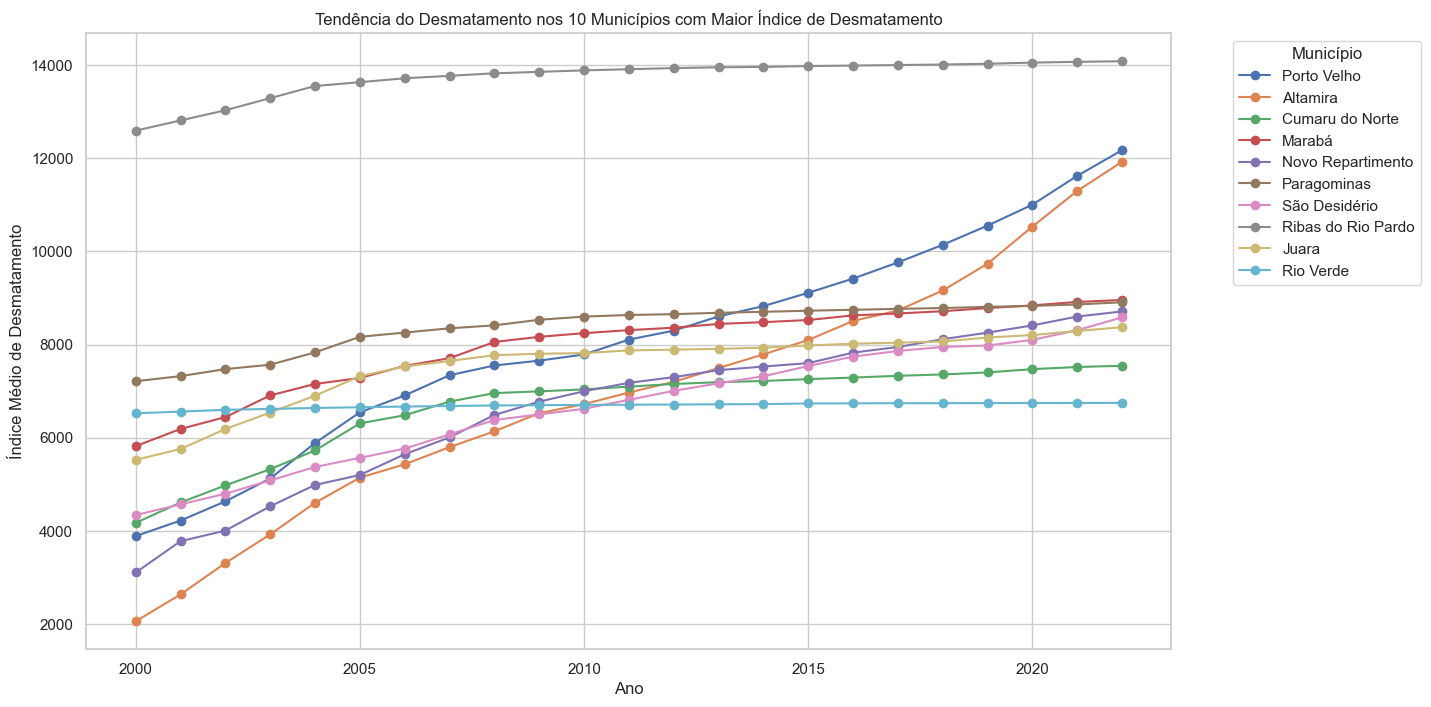

In [ ]:
# Corrigindo a preparação do DataFrame para incluir o código IBGE7 corretamente
top_10_desmatamento_names = top_10_desmatamento.reset_index().merge(municipios_data, left_on='id_municipio', right_on='IBGE7', how='left')

# Selecionando as colunas relevantes, incluindo o código IBGE7
top_10_desmatamento_names = top_10_desmatamento_names[['Município', 'desmatado', 'UF', 'IBGE7']]

# Recriando a lista de IDs dos 10 municípios para a análise das tendências de desmatamento
top_10_municipios_ids = top_10_desmatamento_names['IBGE7'].tolist()

# Filtrando os dados para apenas esses municípios
top_10_municipios_data = desmatamento[desmatamento['id_municipio'].isin(top_10_municipios_ids)]

# Agrupando os dados por município e ano
top_10_desmatamento_trends = top_10_municipios_data.groupby(['id_municipio', 'ano'])['desmatado'].mean().unstack(0)

# Renomeando as colunas com os nomes dos municípios para facilitar a visualização no gráfico
top_10_desmatamento_trends.columns = top_10_desmatamento_trends.columns.map(lambda x: top_10_desmatamento_names[top_10_desmatamento_names['IBGE7'] == x]['Município'].values[0])

# Criando o gráfico de tendências de desmatamento
plt.figure(figsize=(14, 8))
for column in top_10_desmatamento_trends.columns:
    plt.plot(top_10_desmatamento_trends.index, top_10_desmatamento_trends[column], marker='o', label=column)

plt.title('Tendência do Desmatamento nos 10 Municípios com Maior Índice de Desmatamento')
plt.xlabel('Ano')
plt.ylabel('Índice Médio de Desmatamento')
plt.legend(title='Município', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
